In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
n_samples = 1000
df = pd.DataFrame({
    'Annual_Income': np.random.normal(50000, 15000, n_samples),
    'Current_Debt': np.random.normal(10000, 5000, n_samples),
    'Monthly_Installments': np.random.normal(400, 100, n_samples),
    'Number_of_Late_Payments': np.random.poisson(1, n_samples),
    'Credit_Score': np.random.normal(650, 50, n_samples),
    'Employment_Length': np.random.randint(0, 30, n_samples),
    'Bankruptcies': np.random.binomial(1, 0.1, n_samples),
    'Default_History': np.random.binomial(1, 0.2, n_samples)  # Target variable
})

In [3]:
df['Debt_to_Income'] = df['Current_Debt'] / (df['Annual_Income'] + 1)

In [4]:
X = df.drop(columns=['Default_History'])
y = df['Default_History']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # These print statements were incorrectly indented
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.2f}")
    # Correct the indentation for the confusion matrix line
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       239
           1       0.00      0.00      0.00        61

    accuracy                           0.80       300
   macro avg       0.40      0.50      0.44       300
weighted avg       0.63      0.80      0.71       300

ROC-AUC Score: 0.54


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


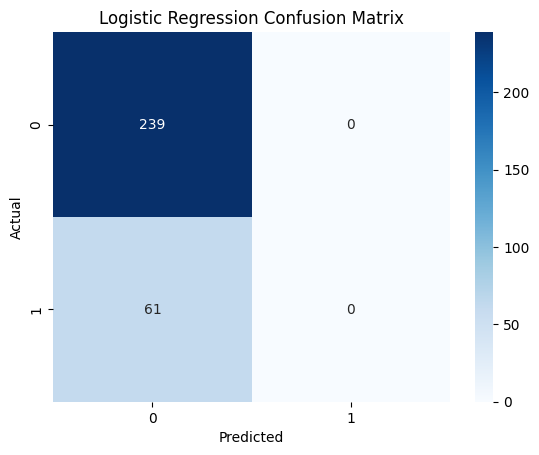

In [12]:
evaluate_model("Logistic Regression", LogisticRegression())


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.80      0.97      0.87       239
           1       0.20      0.03      0.06        61

    accuracy                           0.78       300
   macro avg       0.50      0.50      0.46       300
weighted avg       0.68      0.78      0.71       300

ROC-AUC Score: 0.52


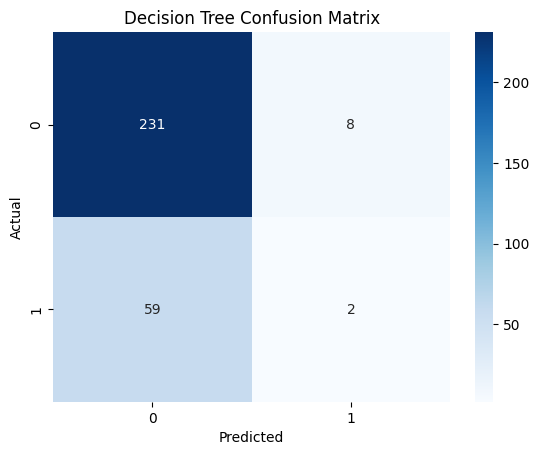

In [13]:
evaluate_model("Decision Tree", DecisionTreeClassifier(max_depth=5))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       239
           1       0.00      0.00      0.00        61

    accuracy                           0.80       300
   macro avg       0.40      0.50      0.44       300
weighted avg       0.63      0.80      0.71       300

ROC-AUC Score: 0.50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


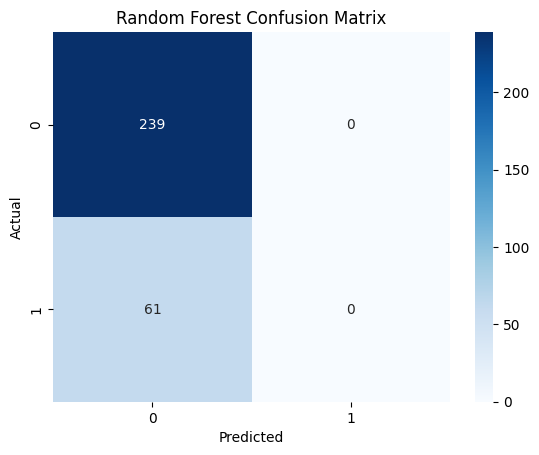

In [14]:
evaluate_model("Random Forest", RandomForestClassifier(n_estimators=100))